# Wind energy

### First insight

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 300

import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "../../../datasets/_classified/kaggle/"

In [3]:
df_wind_on = pd.read_csv(path + "wind_generation_by_country.csv")
df_wind_on.head(2)

,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,FI,FR,EL,HR,HU,IE,IT,LT,LU,LV,NL,NO,PL,PT,RO,SI,SK,SE,UK
0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_wind_st = pd.read_csv(path + "wind_generation_by_station.csv")
df_wind_st.tail(2)

,PL41,ES21,PL32,UKK1,PL34,ES24,CZ06,UKM6,CZ03,ES41,PL33,PL62,BG42,BG31,NO05,UKE2,UKK4,RO21,DK04,PL21,DK01,ES13,HU10,PL52,PL11,HU32,RO11,UKE4,NO07,CH05,IE02,ES42,SE23,PT17,PT15,AT12,BE33,CZ02,HU33,ES70,PL31,PT30,PL63,PL42,UKN0,PT20,SE12,GR22,HU23,BE23,UKD4,UKC1,SE32,BG33,UKG2,UKF3,CZ04,DK03,PL51,CH01,HU21,PL22,PL61,ES12,BE21,UKD1,ES53,NO04,GR30,ES51,AT31,ES23,UKK2,ES30,GR24,AT22,BE31,UKM5,UKD7,AT11,UKF1,DK02,HU22,RO42,UKH3,BE22,FI1B,UKH2,PT18,UKM3,AT32,AT21,HU31,PT11,NO02,CZ05,AT13,UKL2,GR11,PT16,BE32,CZ08,RO12,GR25,UKI2,UKE3,RO31,PL12,GR13,UKJ3,ES22,PL43,UKJ4,SE31,UKD3,FI1D,ES52,UKF2,UKK3,NO06,SE21,BG34,NO03,RO32,GR41,UKH1,SE33,BG32,GR21,BE24,GR14,UKJ1,RO41,CH06,BE34,GR23,BE25,ES62,FI1C,GR43,UKC2,CZ07,SE22,ES43,UKI1,GR42,UKJ2,CH02,IE01,UKM2,FI20,SE11,DK05,UKE1,UKL1,BE35,FI19,GR12,ES11,SK02,RO22,ES61,NL22,ITI3,ITC1,DE80,DEA3,NL42,NL41,ITC4,FR30,DE12,DEB2,DE73,FR71,FR25,FR42,ITI2,ITH1,ITC3,DE50,NL34,FR82,DE27,NL21,ITG2,FR41,DEA5,FR83,DEA4,ITF2,DE25,NL33,DE71,DE93,NL31,FR10,DEF0,ITF4,DED2,FR61,DEA1,ITF5,DEG0,DEA2,ITF6,DE13,DE91,DE21,FR62,SI01,ITI1,FR52,DED4,DEB3,DE14,NL23,DE24,DED5,FR24,DE11,HR03,FR22,FR23,DE22,FR53,DE23,NL12,DEE0,NL32,NL11,ITH5,SI02,DE92,ITF3,DE94,DE60,FR21,DE40,DE30,ITH3,FR63,FR81,ITG1,FR72,DEC0,ITF1,DE72,FR43,ITI4,NL13,DE26,FR26,DEB1,FR51
262966,0.11517,0.02891,0.00746,0.39276,0.06970,0.00093,0.01762,0.45424,0.07164,0.01547,0.0,0.20068,0.17146,0.41602,0.24513,0.42257,0.18939,0.14923,0.16347,0.42667,0.04296,0.16894,0.0,0.10763,0.16247,0.03846,0.06035,0.04482,0.76514,0.0,0.23165,0.00175,0.22597,0.05108,0.00076,0.03709,0.16248,0.03586,0.00051,0.01757,0.03522,0.12906,0.28914,0.10192,0.68302,0.95,0.60937,0.07504,0.00352,0.59955,0.2306,0.65681,0.25374,0.20996,0.95,0.16801,0.01923,0.14489,0.03880,0.0,0.01422,0.36923,0.23919,0.08230,0.51000,0.14923,0.0,0.50450,0.95000,0.01268,0.01532,0.0,0.95,0.0,0.56517,0.05792,0.24323,0.95,0.16587,0.03379,0.96389,0.05515,0.03482,0.00241,0.36377,0.36604,0.14719,0.33305,0.00562,0.18853,0.00846,0.0,0.00337,0.09512,0.49440,0.03292,0.02175,0.09754,0.24578,0.05174,0.35012,0.31172,0.00021,0.09952,0.95,0.35760,0.21114,0.08053,0.0,0.95,0.00182,0.00928,0.05112,0.05449,0.95,0.40205,0.02625,0.40258,0.24227,0.77216,0.76982,0.25418,0.58537,0.05675,0.26362,0.20774,0.33346,NaN,0.27840,0.34681,0.12736,0.56180,0.95,0.05162,0.09103,0.28678,0.17339,0.00164,0.39580,0.95,0.68284,0.05143,0.07742,0.0,0.95,0.86808,0.95,0.00608,0.38180,0.30150,0.95,0.77500,0.21044,0.29278,0.07333,0.30423,0.48866,0.0,0.30903,0.00923,0.14955,0.03798,0.31445,0.01650,0.0,0.02903,0.31705,0.39241,0.53567,0.0,0.80546,0.00391,0.14987,0.06198,0.00038,0.20541,0.04270,0.0,0.0,0.01022,0.42415,0.51554,0.04228,0.00025,0.53834,0.0,0.11824,0.17342,0.0,0.17345,0.00007,0.00008,0.48269,0.00731,0.14214,0.44945,0.25981,0.30255,0.01155,0.01559,0.00000,0.51587,0.01936,0.02311,0.28869,0.01537,0.00582,0.05360,0.00294,0.04694,0.0,0.03633,0.00163,0.06876,0.03606,0.00379,0.30585,0.01215,0.08386,0.14474,0.00082,0.00212,0.49575,0.58929,0.00012,0.09970,0.00003,0.95,0.03464,0.74878,0.26019,0.06528,0.06362,0.19128,0.00275,0.32574,0.18942,0.16208,0.00583,0.00242,0.0,0.02599,0.05426,0.00073,0.00512,0.04609,0.00101,0.02643,0.01273,0.00200,0.34314,0.00096,0.03337,0.07753,0.12646
262967,0.10217,0.04553,0.00406,0.24836,0.07608,0.00126,0.00993,0.44024,0.10114,0.03877,0.0,0.18193,0.12830,0.28308,0.24513,0.36775,0.11083,0.14073,0.17321,0.53333,0.03333,0.32100,0.0,0.10065,0.14812,0.03205,0.11397,0.04590,0.76514,0.0,0.16583,0.00665,0.18175,0.07166,0.00092,0.01582,0.16298,0.04569,0.00017,0.00586,0.03421,0.12537,0.25230,0.08591,0.70828,0.95,0.46292,0.05924,0.00000,0.57372,0.2182,0.58866,0.23043,0.24097,0.95,0.15345,0.02239,0.14007,0.02243,0.0,0.00430,0.59487,0.20702,0.10435,0.49875,0.13592,0.0,0.53028,0.87191,0.00773,0.01532,0.0,0.95,0.0,0.42992,0.06276,0.23472,0.95,0.16196,0.01782,0.79790,0.03996,0.01833,0.00103,0.36495,0.37343,0.14630,0.29745,0.00491,0.18112,0.00846,0.0,0.00337,0.12297,0.42189,0.01830,0.00000,0.10334,0.20675,0.05681,0.33138,0.28662,0.00073,0.07541,0.9

In [5]:
df_wind_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262968 entries, 0 to 262967
Columns: 255 entries, PL41 to FR51
dtypes: float64(255)
memory usage: 511.6 MB


In [6]:
df_wind_st.shape

(262968, 255)

In [7]:
df_wind_on.shape

(262968, 29)

In [8]:
df_wind_st.dtypes

PL41    float64
ES21    float64
PL32    float64
UKK1    float64
PL34    float64
         ...   
NL13    float64
DE26    float64
FR26    float64
DEB1    float64
FR51    float64
Length: 255, dtype: object

In [9]:
#df_wind_st.describe()

In [10]:
#df_wind_on.describe()

### Dealing with timestamps

In [11]:
def add_time(_df):
    "Returns a DF with two new cols : the time and hour of the day"
    t = pd.date_range(start='1/1/1986', periods=_df.shape[0], freq = 'H')
    t = pd.DataFrame(t)
    _df = pd.concat([_df, t], axis=1)
    _df.rename(columns={ _df.columns[-1]: "time" }, inplace = True)
    _df['hour'] = _df['time'].dt.hour
    _df['month'] = _df['time'].dt.month
    _df['week'] = _df['time'].dt.week
    return _df

In [12]:
df_wind_on, df_wind_st = add_time(df_wind_on), add_time(df_wind_st)
df_wind_on.tail(2)

,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,FI,FR,EL,HR,HU,IE,IT,LT,LU,LV,NL,NO,PL,PT,RO,SI,SK,SE,UK,time,hour,month,week
262966,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 22:00:00,22,12,53
262967,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 23:00:00,23,12,53


In [13]:
#df_wind_on.dtypes

Efficiency of solar stations per country during the last day (31th december 2015)

# Exploratory Data Analysis

In [14]:
def plot_hourly(df, title):
    plt.figure(figsize=(14, 9))
    for c in df.columns:
        if c != 'hour':
            sns.lineplot(x="hour", y=c, data=df, label=c)
            #plt.legend(c)
    plt.title(title)
    plt.show()

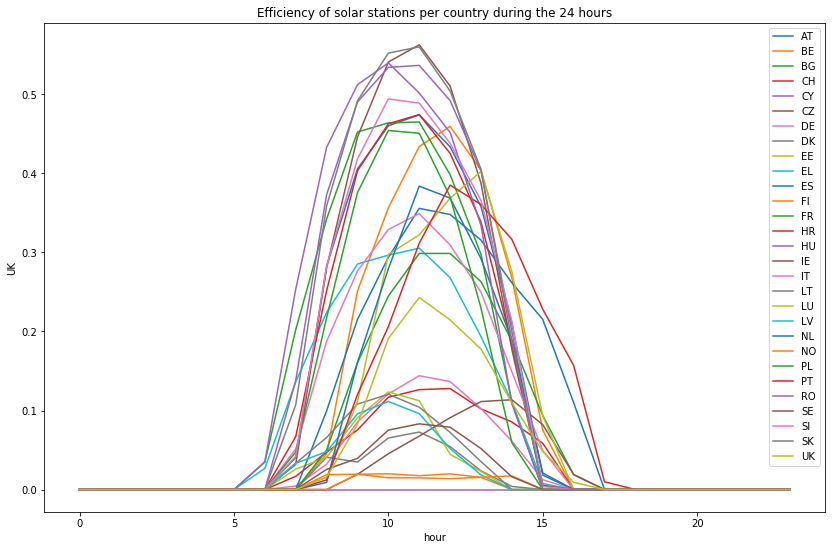

In [15]:
plot_hourly(df_wind_on[df_wind_on.columns.difference(['time', 'month', 'week'])][-24:], "Efficiency of solar stations per country during the 24 hours")

Strange shape, looks like the solar data sets !!!! let's take the datasets from the author's site : https://setis.ec.europa.eu/EMHIRES-datasets

---

In [16]:
del df_wind_on, df_wind_st

df_wind_on = pd.read_csv(path + "EMHIRES_WIND_COUNTRY_June2019.csv")
df_wind_off = pd.read_csv(path + "TS.CF.OFFSHORE.30yr.date.txt", sep='\t')

# convert columns as float
for c in df_wind_on.columns:
    df_wind_on[c] = df_wind_on[c].str.replace(',', '.').astype('float64')
       
# add time infos
df_wind_on = add_time(df_wind_on)
df_wind_on.head()

,AL,AT,BE,BG,BA,CH,CY,CZ,DE,DK,EE,EL,ES,FI,FR,HR,HU,XK,IE,IS,IT,LT,LU,LV,ME,MK,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK,time,hour,month,week
0,0.3685,0.06084,0.25200,0.23762,0.2480,0.04731,0.140,0.12201,0.14169,0.24466,0.03310,0.49272,0.68749,0.31303,0.17573,0.20264,0.04151,0.3685,0.09189,0.834,0.33069,0.45416,0.02208,0.31143,0.284,0.284,0.40628,0.26292,0.12015,0.22683,0.05124,0.25050,0.17086,0.67720,0.05715,0.268794,1986-01-01 00:00:00,0,1,1
1,0.3235,0.05282,0.23841,0.23842,0.2270,0.08463,0.148,0.12907,0.13404,0.21717,0.04100,0.45874,0.66091,0.33866,0.16771,0.16130,0.03706,0.3235,0.06985,0.847,0.30066,0.44609,0.02166,0.27896,0.285,0.285,0.39115,0.26376,0.11985,0.25821,0.04665,0.24625,0.15909,0.66776,0.05218,0.270761,1986-01-01 01:00:00,1,1,1
2,0.2735,0.04276,0.22110,0.23033,0.2000,0.11741,0.157,0.12151,0.13172,0.19431,0.05674,0.42724,0.63251,0.36834,0.15877,0.13140,0.03250,0.2735,0.07464,0.843,0.27052,0.45043,0.01921,0.25944,0.262,0.262,0.36163,0.26695,0.12113,0.27921,0.04543,0.23250,0.15296,0.65904,0.03905,0.265209,1986-01-01 02:00:00,2,1,1
3,0.2600,0.02914,0.21491,0.24158,0.1875,0.13830,0.171,0.09998,0.13686,0.18278,0.07081,0.42569,0.61890,0.39019,0.14818,0.10758,0.02810,0.2600,0.09003,0.829,0.24614,0.43283,0.01655,0.23939,0.262,0.262,0.35170,0.27101,0.11858,0.33106,0.04455,0.20525,0.15328,0.58460,0.02130,0.257709,1986-01-01 03:00:00,3,1,1
4,0.2530,0.01780,0.20304,0.26168,0.1690,0.13895,0.179,0.07800,0.14124,0.17356,0.08243,0.44443,0.62397,0.40209,0.13631,0.09077,0.02681,0.2530,0.13664,0.798,0.21655,0.40777,0.01331,0.22052,0.243,0.243,0.36168,0.28097,0.11101,0.38668,0.05438,0.20075,0.15013,0.46732,0.01029,0.247726,1986-01-01 04:00:00,4,1,1


In [17]:
df_wind_off.tail()

,Time step,Date,Year,Month,Day,Hour,BE,DK,DE,NL,UK
262963,262964,31/12/2015 19:00,2015,12,31,19,0.86044,0.55980,0.62959,0.80591,0.59402
262964,262965,31/12/2015 20:00,2015,12,31,20,0.85848,0.54871,0.63238,0.81795,0.57018
262965,262966,31/12/2015 21:00,2015,12,31,21,0.85848,0.56894,0.63756,0.82433,0.52357
262966,262967,31/12/2015 22:00,2015,12,31,22,0.86632,0.59640,0.64048,0.82293,0.48621
262967,262968,31/12/2015 23:00,2015,12,31,23,0.86821,0.60744,0.64174,0.81602,0.46916


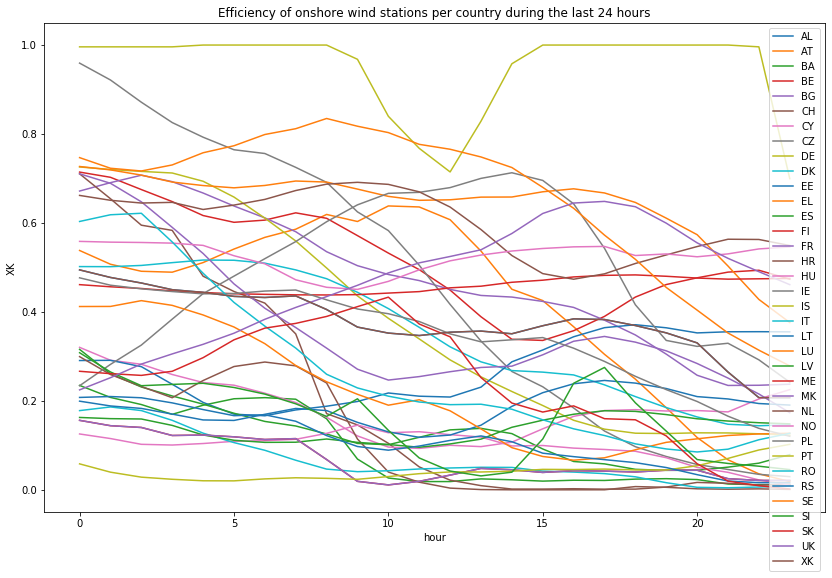

In [19]:
plot_hourly(df_wind_on[df_wind_on.columns.difference(['time', 'month', 'week'])][-24:], "Efficiency of onshore wind stations per country during the last 24 hours")

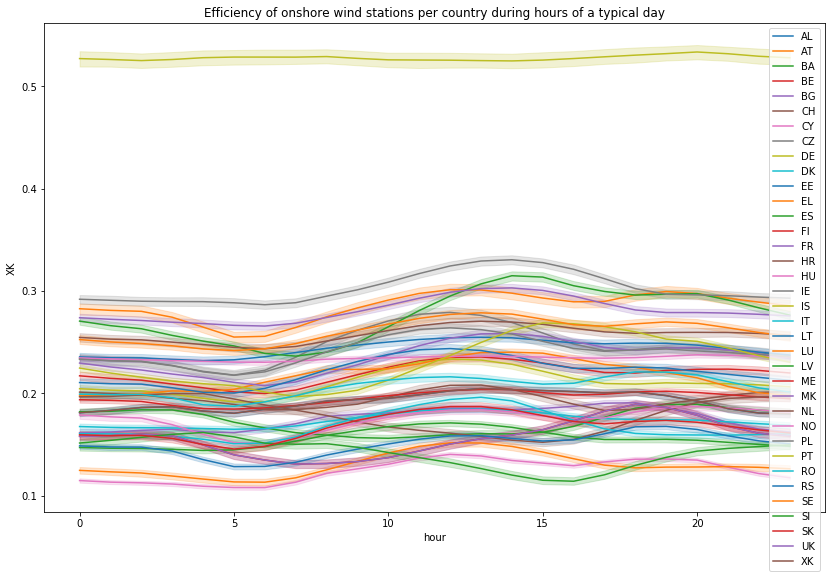

In [20]:
plot_hourly(df_wind_on[df_wind_on.columns.difference(['time', 'month', 'week'])], "Efficiency of onshore wind stations per country during hours of a typical day")

Distribution of the station's efficiency for non null values (ie during the day)

Text(0.5, 1.0, "Distribution of the station's efficiency for non null values (ie during the day)")

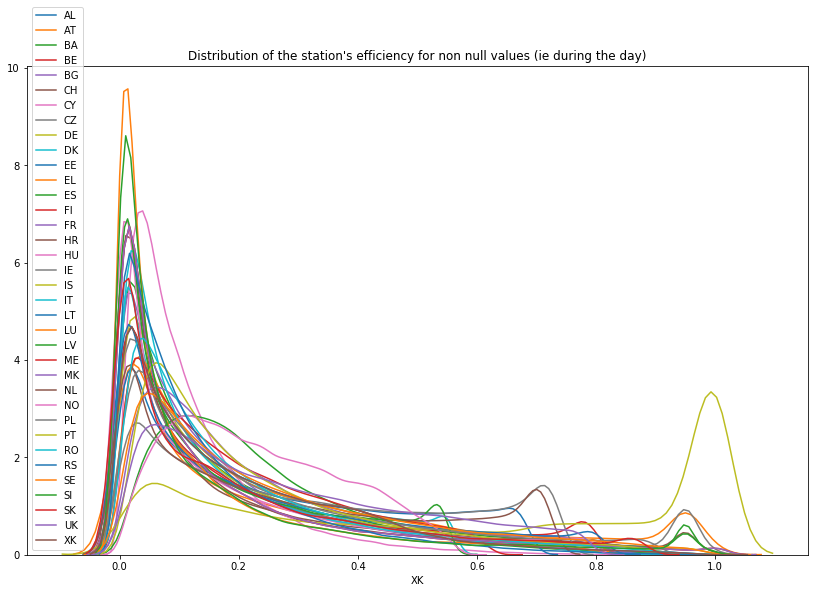

In [22]:
temp_df = df_wind_on[df_wind_on.columns.difference(['time', 'hour', 'month', 'week'])]
plt.figure(figsize=(14, 9))
for col in temp_df.columns:
    sns.distplot(temp_df[temp_df[col] != 0][col], label=col, hist=False)
plt.title("Distribution of the station's efficiency for non null values (ie during the day)")

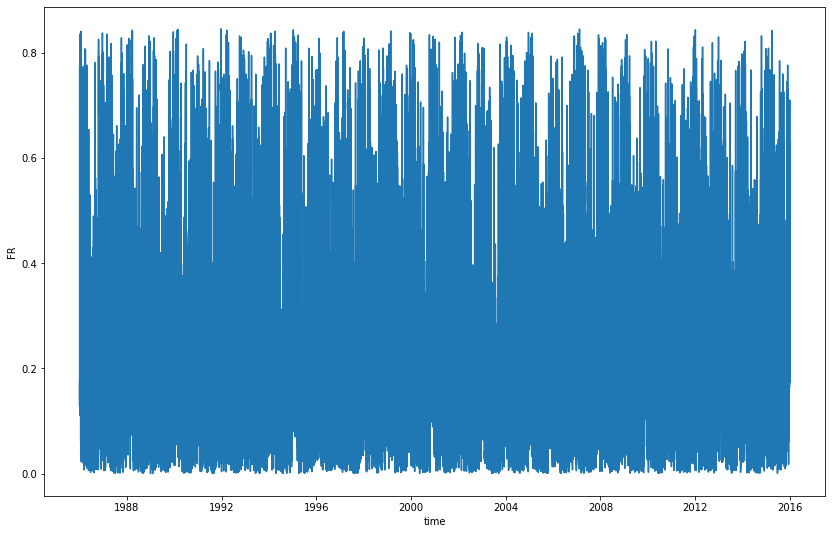

In [23]:
plt.figure(figsize=(14, 9))
sns.lineplot(x = df_wind_on.time, y = df_wind_on['FR'])

Text(0.5, 1.0, 'Efficiency across the months per country')

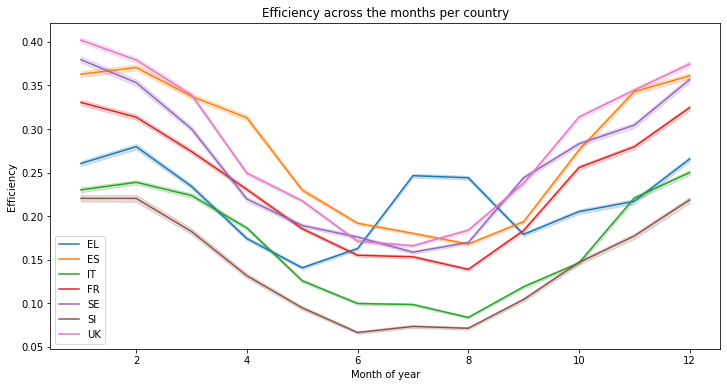

In [24]:
countries = ['EL', 'ES', 'IT', 'FR', 'SE', 'SI', 'UK']

plt.figure(figsize=(12, 6))
for c in countries:
    temp_df = df_wind_on[[c, 'month']]
    sns.lineplot(x=temp_df["month"], y=temp_df[c], label=c)
plt.xlabel("Month of year")
plt.ylabel("Efficiency") 
plt.title("Efficiency across the months per country")

Text(0.5, 1.0, 'Efficiency across the weeks per country')

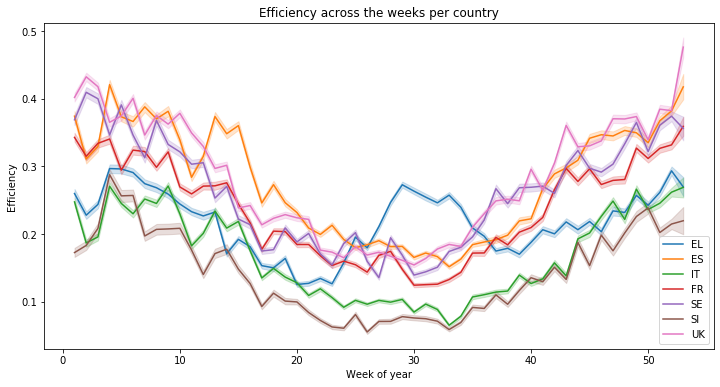

In [25]:
plt.figure(figsize=(12, 6))
for c in countries:
    temp_df = df_wind_on[[c, 'week']]
    sns.lineplot(x=temp_df["week"], y=temp_df[c], label=c)
plt.xlabel("Week of year")
plt.ylabel("Efficiency") 
plt.title("Efficiency across the weeks per country")

In [26]:
temp_df = df_wind_on.copy()
temp_df['year'] = temp_df['time'].dt.year
temp_df.head()

,AL,AT,BE,BG,BA,CH,CY,CZ,DE,DK,EE,EL,ES,FI,FR,HR,HU,XK,IE,IS,IT,LT,LU,LV,ME,MK,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK,time,hour,month,week,year
0,0.3685,0.06084,0.25200,0.23762,0.2480,0.04731,0.140,0.12201,0.14169,0.24466,0.03310,0.49272,0.68749,0.31303,0.17573,0.20264,0.04151,0.3685,0.09189,0.834,0.33069,0.45416,0.02208,0.31143,0.284,0.284,0.40628,0.26292,0.12015,0.22683,0.05124,0.25050,0.17086,0.67720,0.05715,0.268794,1986-01-01 00:00:00,0,1,1,1986
1,0.3235,0.05282,0.23841,0.23842,0.2270,0.08463,0.148,0.12907,0.13404,0.21717,0.04100,0.45874,0.66091,0.33866,0.16771,0.16130,0.03706,0.3235,0.06985,0.847,0.30066,0.44609,0.02166,0.27896,0.285,0.285,0.39115,0.26376,0.11985,0.25821,0.04665,0.24625,0.15909,0.66776,0.05218,0.270761,1986-01-01 01:00:00,1,1,1,1986
2,0.2735,0.04276,0.22110,0.23033,0.2000,0.11741,0.157,0.12151,0.13172,0.19431,0.05674,0.42724,0.63251,0.36834,0.15877,0.13140,0.03250,0.2735,0.07464,0.843,0.27052,0.45043,0.01921,0.25944,0.262,0.262,0.36163,0.26695,0.12113,0.27921,0.04543,0.23250,0.15296,0.65904,0.03905,0.265209,1986-01-01 02:00:00,2,1,1,1986
3,0.2600,0.02914,0.21491,0.24158,0.1875,0.13830,0.171,0.09998,0.13686,0.18278,0.07081,0.42569,0.61890,0.39019,0.14818,0.10758,0.02810,0.2600,0.09003,0.829,0.24614,0.43283,0.01655,0.23939,0.262,0.262,0.35170,0.27101,0.11858,0.33106,0.04455,0.20525,0.15328,0.58460,0.02130,0.257709,1986-01-01 03:00:00,3,1,1,1986
4,0.2530,0.01780,0.20304,0.26168,0.1690,0.13895,0.179,0.07800,0.14124,0.17356,0.08243,0.44443,0.62397,0.40209,0.13631,0.09077,0.02681,0.2530,0.13664,0.798,0.21655,0.40777,0.01331,0.22052,0.243,0.243,0.36168,0.28097,0.11101,0.38668,0.05438,0.20075,0.15013,0.46732,0.01029,0.247726,1986-01-01 04:00:00,4,1,1,1986


Text(0.5, 1.0, 'Efficiency across the years per country')

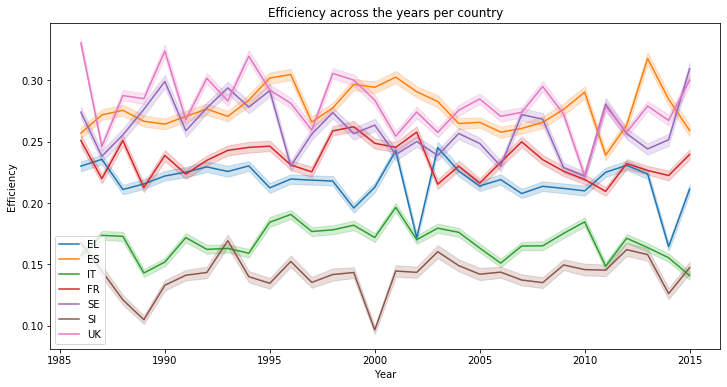

In [27]:
plt.figure(figsize=(12, 6))
for c in countries:
    temp_df_ = temp_df[[c, 'year']]
    sns.lineplot(x=temp_df_["year"], y=temp_df_[c], label=c)
plt.xlabel("Year")
plt.ylabel("Efficiency") 
plt.title("Efficiency across the years per country")

### If we consider ONLY values between 5 AM & 10 PM

In [28]:
temp_df = df_wind_on[(5 < df_wind_on.hour) & (df_wind_on.hour < 22)]
temp_df = temp_df.drop(columns=['time', 'hour', 'month', 'week'])
temp_df.describe()

,AL,AT,BE,BG,BA,CH,CY,CZ,DE,DK,EE,EL,ES,FI,FR,HR,HU,XK,IE,IS,IT,LT,LU,LV,ME,MK,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK
count,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.00000,175312.000000
mean,0.196630,0.289140,0.222400,0.181517,0.168481,0.193756,0.130022,0.254143,0.215351,0.176729,0.248272,0.225849,0.283014,0.198143,0.240374,0.171343,0.176312,0.196648,0.308320,0.527994,0.173129,0.227813,0.134548,0.160101,0.157523,0.157523,0.260164,0.234971,0.246783,0.237301,0.211360,0.153344,0.266233,0.135392,0.17337,0.285813
std,0.192629,0.300156,0.227933,0.182196,0.181413,0.244573,0.120837,0.274002,0.221864,0.159244,0.209381,0.196646,0.225966,0.158989,0.200631,0.218957,0.207563,0.192687,0.233573,0.380407,0.178245,0.224845,0.182692,0.162288,0.220998,0.220998,0.231254,0.138105,0.229751,0.205017,0.202197,0.163898,0.230592,0.223154,0.22177,0.211161
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000330,0.000000,0.000070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000260,0.000000,0.000070,0.000000,0.000000,0.000540,0.000000,0.00000,0.000317
25%,0.041500,0.039767,0.037160,0.043870,0.031500,0.018010,0.046000,0.040377,0.044300,0.039627,0.059935,0.064177,0.117660,0.064098,0.083020,0.016600,0.013200,0.041500,0.094740,0.144000,0.036580,0.039100,0.009920,0.023030,0.007000,0.007000,0.050938,0.120260,0.063980,0.080380,0.059970,0.034000,0.081520,0.002900,0.00177,0.105734
50%,0.136000,0.170620,0.137120,0.121120,0.099000,0.087880,0.093000,0.149790,0.135680,0.128890,0.193110,0.163200,0.213880,0.156690,0.176560,0.069440,0.089315,0.136000,0.262780,0.514000,0.105150,0.149730,0.053750,0.099180,0.061000,0.061000,0.192880,0.215250,0.168340,0.167090,0.140120,0.095750,0.194655,0.033040,0.07526,0.236388
75%,0.304000,0.468115,0.347680,0.258840,0.252000,0.273593,0.174000,0.378010,0.317760,0.283495,0.414875,0.348832,0.382395,0.303220,0.349310,0.247670,0.272740,0.304000,0.510803,0.966000,0.256833,0.363420,0.182610,0.262432,0.211000,0.211000,0.442210,0.339300,0.371740,0.336580,0.300880,0.217750,0.394253,0.158680,0.26447,0.436569
max,0.996008,0.999980,0.795510,0.896790,1.001500,0.999950,0.927000,0.999990,0.986460,0.559040,0.680560,0.871850,0.999830,0.634490,0.845160,0.956380,0.805390,1.004500,0.733650,0.999063,0.870380,0.815800,0.807770,0.556100,1.022000,1.022000,0.712360,0.577840,0.911160,0.959080,0.991090,1.008000,0.999930,0.999640,0.88321,0.791400


In [29]:
def plot_by_country(_df, title, nb_col):
    _df = _df.describe().iloc[nb_col, :]
    plt.figure(figsize=(14, 6))
    sns.barplot(x=_df.index, y=_df.values)
    plt.title(title)

#plot_by_country("Mean efficiency by country", 1)

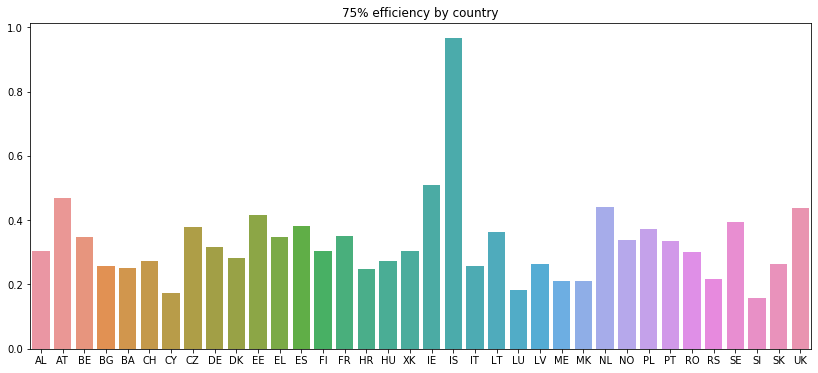

In [30]:
plot_by_country(temp_df, "75% efficiency by country", 6)

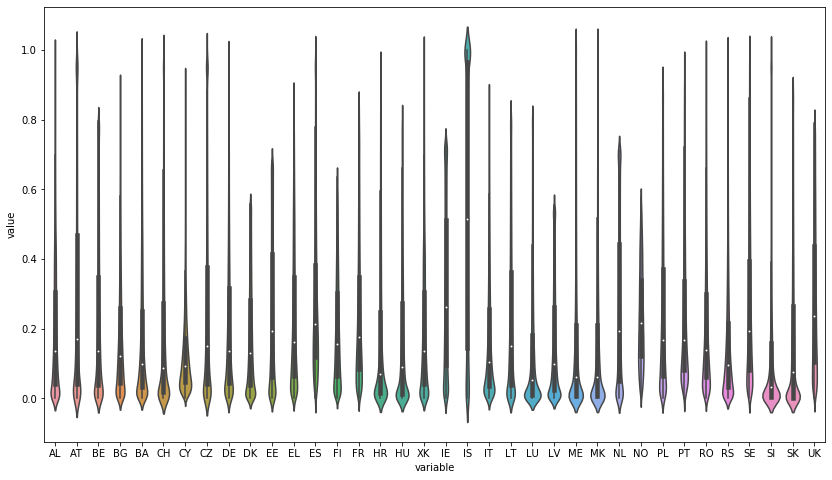

In [31]:
# credits : https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn
# This works because pd.melt converts a wide-form dataframe
plt.figure(figsize=(14, 8))
sns.violinplot(x="variable", y="value", data=pd.melt(temp_df))

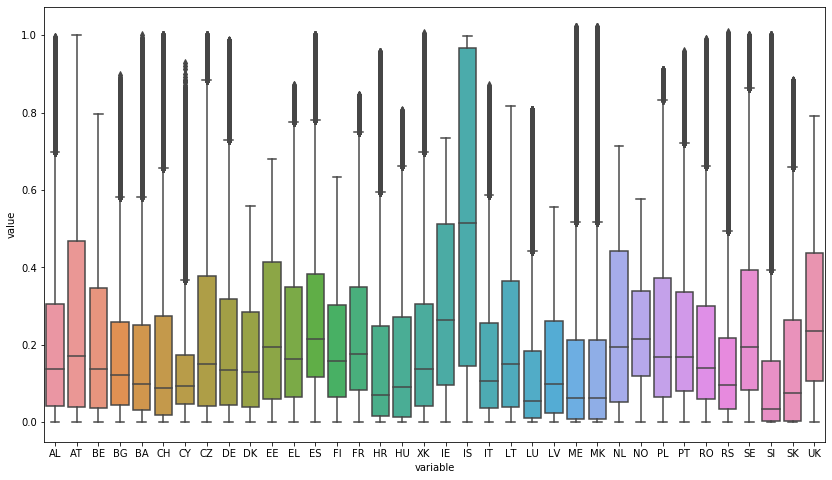

In [32]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="variable", y="value", data=pd.melt(temp_df))

Text(0.5, 1.0, "Distribution of the station's efficiency")

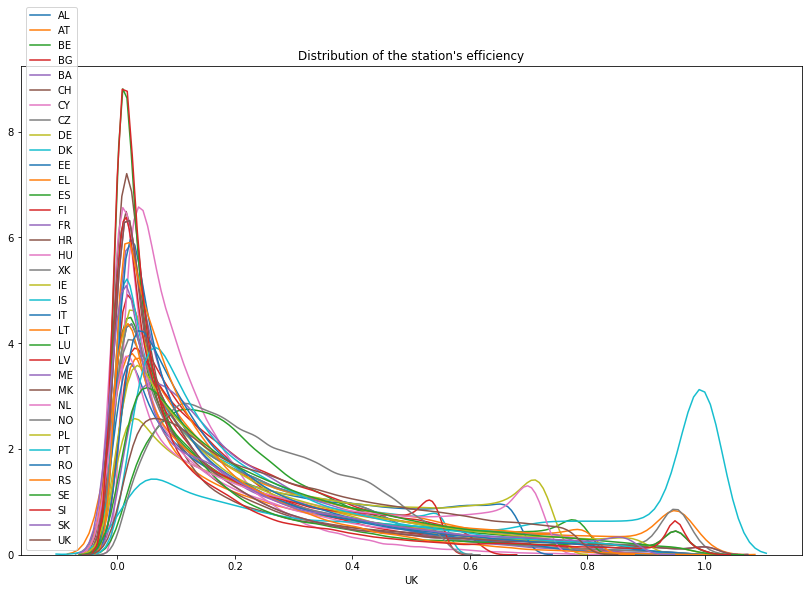

In [33]:
plt.figure(figsize=(14, 9))
for col in temp_df.columns:
    sns.distplot(temp_df[temp_df[col] != 0][col], label=col, hist=False)
plt.title("Distribution of the station's efficiency")

## Correlations

In [34]:
def plot_corr(df_):
    corr = df_.corr()
    corr

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(14, 12))

    # Generate a custom diverging colormap
    #cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, center=0, square=True, cmap='Spectral', linewidths=.5, cbar_kws={"shrink": .5}) #annot=True

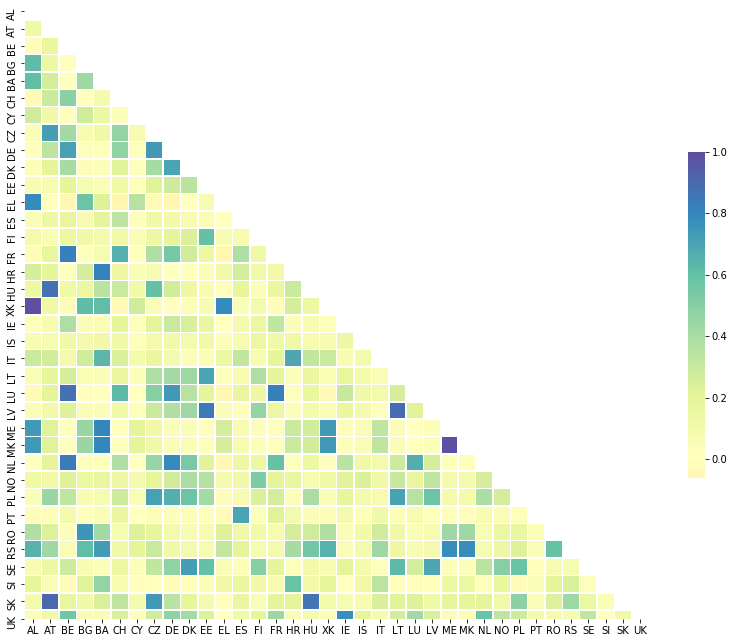

In [35]:
plot_corr(temp_df)

In [36]:
temp_df.corr()

,AL,AT,BE,BG,BA,CH,CY,CZ,DE,DK,EE,EL,ES,FI,FR,HR,HU,XK,IE,IS,IT,LT,LU,LV,ME,MK,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK
AL,1.000000,0.128395,-0.023705,0.621772,0.611033,-0.031705,0.281586,0.047733,-0.002414,0.034789,0.069253,0.783412,0.043343,0.089165,-0.022057,0.252318,0.144441,0.999998,0.032386,0.066346,0.301999,0.052348,-0.034827,0.058348,0.741362,0.741362,-0.003632,0.132685,0.042096,-0.016098,0.378429,0.647591,0.065879,0.184268,0.097485,0.044675
AT,0.128395,1.000000,0.158395,0.142567,0.260616,0.297899,0.112868,0.722190,0.340295,0.187510,0.078874,0.014646,0.144073,0.051915,0.179427,0.200825,0.878197,0.128424,0.081776,0.074445,0.270327,0.183907,0.193816,0.111629,0.219491,0.219491,0.186937,0.110243,0.445829,0.037859,0.235109,0.433741,0.142014,0.051754,0.904977,0.114346
BE,-0.023705,0.158395,1.000000,-0.000865,0.014263,0.497395,-0.001320,0.425706,0.712156,0.413782,0.196732,-0.056389,0.176583,0.148968,0.821747,0.014520,0.132500,-0.023684,0.382081,0.128354,0.093605,0.253465,0.872993,0.221760,0.008354,0.008354,0.838929,0.224332,0.330556,0.092853,0.041386,0.062227,0.285315,-0.024201,0.176918,0.562373
BG,0.621772,0.142567,-0.000865,1.000000,0.431857,0.014889,0.281624,0.085292,0.024291,0.038469,0.084474,0.581603,0.077070,0.118522,0.021949,0.252832,0.154531,0.621789,0.044055,0.093581,0.277073,0.060392,-0.000222,0.059505,0.446664,0.446664,0.021375,0.144880,0.067403,0.025735,0.751600,0.615654,0.065044,0.213704,0.121103,0.055408
BA,0.611033,0.260616,0.014263,0.431857,1.000000,0.093101,0.147382,0.120816,0.029596,0.035325,0.052837,0.223842,0.208599,0.091460,0.081105,0.813618,0.352597,0.611151,0.050698,0.119593,0.635860,0.055932,0.012857,0.041713,0.797543,0.797543,0.032266,0.171698,0.080438,0.056164,0.427790,0.732561,0.041191,0.463428,0.241202,0.066381
CH,-0.031705,0.297899,0.497395,0.014889,0.093101,1.000000,0.038212,0.468205,0.484513,0.218407,0.130497,-0.058345,0.340052,0.108326,0.662516,0.137095,0.302387,-0.031676,0.188390,0.113644,0.243633,0.181879,0.625780,0.131715,0.010602,0.010602,0.374595,0.139228,0.290455,0.159849,0.079360,0.123438,0.153440,0.080333,0.333282,0.247728
CY,0.281586,0.112868,-0.001320,0.281624,0.147382,0.038212,1.000000,0.075820,0.022777,0.017637,0.028888,0.357186,0.022004,0.053508,0.012723,0.043791,0.107825,0.281631,0.016738,0.031553,0.098688,0.036921,0.007503,0.029602,0.196522,0.196522,0.002161,0.093504,0.052870,0.007203,0.233734,0.201609,0.040366,-0.003509,0.094443,0.022485
CZ,0.047733,0.722190,0.425706,0.085292,0.120816,0.468205,0.075820,1.000000,0.734473,0.410373,0.219942,-0.029218,0.123443,0.136269,0.380030,0.077510,0.606395,0.047754,0.187601,0.093641,0.167578,0.382233,0.506182,0.295995,0.117926,0.117926,0.455207,0.184000,0.716046,0.034276,0.185887,0.303766,0.326971,0.004548,0.740474,0.278620
DE,-0.002414,0.340295,0.712156,0.024291,0.029596,0.484513,0.022777,0.734473,1.000000,0.695188,0.289677,-0.053619,0.111985,0.187339,0.554392,0.002380,0.273259,-0.002392,0.305378,0.104687,0.090647,0.426625,0.738161,0.376200,0.046123,0.046123,0.787779,0.266943,0.669089,0.037151,0.090971,0.129689,0.485312,-0.025282,0.348121,0.477835
DK,0.034789,0.187510,0.413782,0.038469,0.035325,0.218407,0.017637,0.410373,0.695188,1.000000,0.345001,0.001075,0.074680,0.244795,0.277569,0.013718,0.138085,0.034791,0.246716,0.092846,0.034418,0.441672,0.358078,0.436178,0.043766,0.043766,0.546708,0.404372,0.581047,0.033945,0.066448,0.091354,0.720627,-0.011625,0.186173,0.416210


## Heatmap month vs hours 

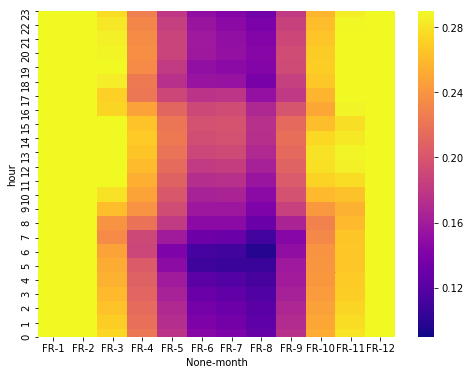

In [37]:
# credits S Godinho @ https://www.kaggle.com/sgodinho/wind-energy-potential-prediction

df_wind_on['year'] = df_wind_on['time'].dt.year
plt.figure(figsize=(8, 6))
temp_df = df_wind_on[['FR', 'month', 'hour']]
temp_df = temp_df.groupby(['hour', 'month']).mean()
temp_df = temp_df.unstack('month').sort_index(ascending=False)
sns.heatmap(temp_df, vmin = 0.09, vmax = 0.29, cmap = 'plasma')